# To. 뉴진스.. 

```
‘공공도서관 프로그램'으로 검색했을 때... 

문제 1. 키워드가 들어간 트윗 자체가 많이 없음 
-> ‘지역+도서관' 으로 추가 검색해보면 더 많은 자료가 나올 것 가틈. 

문제 2. 도서관 측에서 뿌린 홍보자료가 넘 많이 나옴 
-> 좋아요가 아예 없는 트윗은 삭제하니까 ㄱㅊ았음... 다른 검색키워드로는 어떨지 모르겠네여

```

In [4]:
!pip3 install snscrape

     |████████████████████████████████| 59 kB 1.3 MB/s eta 0:00:01


In [195]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# 트윗을 긁어와서 넣어놓을 리스트 생성
tweets_list = []

# TwitterSearchScraper를 이용하여 해당 트윗을 긁어와서 리스트에 넣기 ('검색어 since:시작날짜 until:끝나는날짜')
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('다문화 since:2021-01-01 until:2022-08-23').get_items()):
    if i > 10000:
        break
    tweets_list.append([tweet.date, tweet.content, tweet.likeCount])
    
# 다 긁어왔다면 데이터 프레임으로 저장시키기
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'content', 'Like'])
tweets_df

,Datetime,content,Like
0,2022-08-22 23:35:36+00:00,"다문화 기금 1조 늘리고, 빈곤층 기금 8천억 깍다 https://t.co/F3...",0
1,2022-08-22 23:05:35+00:00,괴담괴담 하지만 이게 다문화 한국의 현실 https://t.co/br7mYJAyP...,0
2,2022-08-22 22:28:24+00:00,01ZFZO\n\n영천구인구직\n제주가오픈카페\n당구장\n뒤태미녀\n북촌맛집\n송파...,0
3,2022-08-22 21:36:25+00:00,Z6LMX\n\n도치맘들\n천안아산심야애견카페\n시트러스블리스\n양태양과장\n다문화...,0
4,2022-08-22 20:04:27+00:00,다문화가정과 함께하는 따듯한 명절맞이 사랑나눔 소식! -국제위러브유운동본부(회장 장...,0
...,...,...,...
9996,2022-01-04 19:32:10+00:00,세계시민교육 혹은 다문화이해교육이 절실해지는 사회이다. SNS와 인터넷까페에 자신의...,4
9997,2022-01-04 18:48:49+00:00,정치적 관점에서 본 \n한국 다문화 현상의 문제점 \n\n(프랑스 뚤루주 국립사회과...,0
9998,2022-01-04 18:21:33+00:00,결혼이나 연애 관련 사연글에 올라오는 찐따남들 향해 남녀 할 것 없이 놀려대는 말이...,1
9999,2022-01-04 18:18:38+00:00,다문화를 특별히 오구오구 보듬어줘야 할 당위성 따윈 1도 없어. https://t....,2


In [196]:
tweets_df = tweets_df.drop_duplicates(subset='content')

In [197]:
# '공공도서관 프로그램'이라는 키워드에는 도서관 홍보자료가 너무 많아서 좋아요가 아예 없는 트윗은 제거했음
tweets_df.sort_values(by = "Like", ascending=False)
tweets_df = tweets_df[tweets_df['Like']>0]

In [198]:
#여러 키워드로 검색 많이 해봐야 할 것 같아서 '검색결과+시작월일+끝나는월일+'의 형식으로 파일 저장했음
tweets_df.to_csv('다문화 20210101_20220823.csv', encoding="utf-8-sig", index=False)

In [17]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [199]:
import pandas as pd
import multiprocessing
import numpy as np
from collections import defaultdict
from tqdm import trange
import re
import numpy as np
from collections import defaultdict


data = pd.read_csv('다문화 20210101_20220823.csv',engine='python',encoding='utf-8-sig')
del data['Like']
data

,Datetime,content
0,2022-08-22 13:15:47+00:00,@pedestrian_1234 다문화 혜택 반의반이라도 이런 청소년들에게 돌아갔으면
1,2022-08-22 10:34:05+00:00,어제 기분전환겸 안산 다문화거리 갔다가 간만에 산둥식 만두 https://t.co/...
2,2022-08-22 10:01:06+00:00,조선족은 성격이 나쁘고 한국인을 무시하니까 차별해야 마땅해/ 다문화 가정은 대부분이...
3,2022-08-22 09:06:38+00:00,공덕이 참 많으세요\n얘기 잠깐 듣고 가세요\n이제 다문화가정에서도 조상을 챙기는구나..
4,2022-08-22 07:34:31+00:00,그저 다문화 또는 외국인이라는 이유만으로 정도 이상의 혜택을 주어야 한다라는 주장 ...
...,...,...
2295,2022-01-05 02:55:48+00:00,몇번을 말했지만 이제 이민과 다인종다문화 사회 어쩔 수 없단 말임.. 근데 한핏줄 ...
2296,2022-01-04 20:58:20+00:00,@VitaminDjjang 국제학교와 다문화학교의 이미지 차이는 크죠. 국제는 백인...
2297,2022-01-04 19:32:10+00:00,세계시민교육 혹은 다문화이해교육이 절실해지는 사회이다. SNS와 인터넷까페에 자신의...
2298,2022-01-04 18:21:33+00:00,결혼이나 연애 관련 사연글에 올라오는 찐따남들 향해 남녀 할 것 없이 놀려대는 말이...


In [200]:
# Basic Cleaning Text Function
def Twitter_use_only(readData, Num=False, Eng=False):
    list_text = []
    
    for i in trange(len(data['content'])):
        
        pre_text = data['content'][i]
        # Retweets 제거
        text = re.sub('RT @[\w_]+: ', '', pre_text)

        # enticons 제거
        text = re.sub('@[\w_]+', '', text)

        # URL 제거
        text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text) # http로 시작되는 url
        text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text) # http로 시작되지 않는 url
    #     pattern = '(http|ftp|https)://(?:[-\w.]|(?:\da-fa-F]{2}))+'
    #     text = re.sub(pattern = pattern, repl = ' ',string=text)

        # Hashtag 제거
        text = re.sub('[#]+[0-9a-zA-Z_]+', ' ', text)

        # 쓰레기 단어 제거
        text = re.sub('[&]+[a-z]+', ' ', text)

        # 특수문자 제거
        text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)

        # 띄어쓰기 제거
        text = text.replace('\n',' ')

        if Num is True:
            # 숫자 제거
            text = re.sub(r'\d+',' ',text)

        if Eng is True:
            # 영어 제거 
            text = re.sub('[a-zA-Z]' , ' ', text)

        # 정리
        text = ' '.join(text.split())
        list_text.append(text)
    
#         print(list_text)

    del data['content']
    
    return list_text
# 문장 단어별 split
def WordList(data):
    f_list = []
    
    data['text'] = data['text'].astype(str)
    
    for i in trange(len(data)):
        f_list.append(data['text'][i].split())
    
    return f_list

text = Twitter_use_only(data)

text_df = pd.DataFrame(text)
data_df = pd.concat([data,text_df],axis=1)
data_df.columns = ['tweet_date', 'text']

data_df_reset = data_df.reset_index(drop=True)

100%|████████████████████████████████████| 2300/2300 [00:00<00:00, 11279.99it/s]


In [201]:
data_df_reset

,tweet_date,text
0,2022-08-22 13:15:47+00:00,다문화 혜택 반의반이라도 이런 청소년들에게 돌아갔으면
1,2022-08-22 10:34:05+00:00,어제 기분전환겸 안산 다문화거리 갔다가 간만에 산둥식 만두
2,2022-08-22 10:01:06+00:00,조선족은 성격이 나쁘고 한국인을 무시하니까 차별해야 마땅해 다문화 가정은 대부분이 ...
3,2022-08-22 09:06:38+00:00,공덕이 참 많으세요 얘기 잠깐 듣고 가세요 이제 다문화가정에서도 조상을 챙기는구나
4,2022-08-22 07:34:31+00:00,그저 다문화 또는 외국인이라는 이유만으로 정도 이상의 혜택을 주어야 한다라는 주장 ...
...,...,...
2295,2022-01-05 02:55:48+00:00,몇번을 말했지만 이제 이민과 다인종다문화 사회 어쩔 수 없단 말임 근데 한핏줄 한민...
2296,2022-01-04 20:58:20+00:00,국제학교와 다문화학교의 이미지 차이는 크죠 국제는 백인용 다문화는 제3세계용
2297,2022-01-04 19:32:10+00:00,세계시민교육 혹은 다문화이해교육이 절실해지는 사회이다 SNS와 인터넷까페에 자신의 ...
2298,2022-01-04 18:21:33+00:00,결혼이나 연애 관련 사연글에 올라오는 찐따남들 향해 남녀 할 것 없이 놀려대는 말이...


In [202]:
aa = WordList(data_df_reset)

ll = data_df_reset['text']

ll_list = ll.tolist()

# okt.nouns

from konlpy.tag import Okt
okt = Okt()



import sys

o_ll = []
for i in trange(len(ll_list)):
    real_text = okt.normalize(ll_list[i])
    o_ll.append(real_text)
result = ' '.join(o_ll)
#result

100%|██████████████████████████████████████| 2300/2300 [00:15<00:00, 152.25it/s]


In [251]:
result

'다문화 혜택 반의반이라도 이런 청소년들에게 돌아갔으면 어제 기분전환겸 안산 다문화거리 갔다가 간만에 산둥식 만두 조선족은 성격이 나쁘고 한국인을 무시하니까 차별해야 마땅해 다문화 가정은 대부분이 매매혼이니 매매혼을 옹호하지 않습니다만 차별해야 마땅해 흑인들 동양인 차별 엄청 한다면서 그럼 우리도 역지사지다 이런 사고방식이라 공덕이 참 많으세요 얘기 잠깐 듣고 가세요 이제 다문화가정에서도 조상을 챙기는구나 그저 다문화 또는 외국인이라는 이유만으로 정도 이상의 혜택을 주어야 한다라는 주장 자체부터가 세금도둑질을 위한 포석에 불과합니다 전세계 한류팬과 다문화가족에게 제공하는 한국이름 작명서비스 짜증나는 외국인 취급을 허구한 날 받았고 그 탓에 한국에서 태어난 다문화가정 애들이랑 지내다보면 하루라도 사람들에게 눈총 안받고 그들의 부모 욕을 안들은적이 없다고 했다 그리고 본인들은 미래에 제대로 된 꿈은 커녕 다음 학년에는 친구 하나 더 사귈 수 있을까 하는 고민이 앞섰던 애들이고 우리는 롤링이 왜 한국인 배우가 연기하는 동아시아인 캐릭터가 인도 신화에서 유래한 이름을 갖고 있냐는 질문에 인도네시아 다문화 국가임 이라는 대답을 한 적이 있다는 것을 기억해야 요즘은 정치라는 개판이 싫어서 뉴스도 안 보고 뭐 그런다 그러다 다문화 가정 유튜브를 보는 데 하나같이 가슴아픈 사연들이다 어쩌다 잘사는 부부들도 있지만 거의가 여자들이 가정을 책임지고 꾸려가는 거기에 자식들은 효자 효녀고 그러니까 힘들어도 살맛나지 싶다 인구 감소 자체는 문제될 것 없는데 속도가 너무 빨리서 대규모 이민이 한국 정치를 긍정적으로 바꿀 수 있을지도 궁금 한국이 동북아 유일의 역동적인 다원화 다문화 사회가 될 수 있었으면 좋으련만 은평구가 돈 함부로 쓰고 박물관 따위 만드는것으로 유명하지요 다문화박물관 이 있어요 불행 중 다행이라면 요즘 들어서 간 신 히 약자랍시고 다 선인은 아니다라는 걸 사람들이 알아채고서 두들겨패기 시작했음 전장연 민노총 다문화 뭐 이런 쓰잘데 없는 것들 영류왕때 귀족들이 당나라에

In [203]:
#konlpy(코엔엘파이) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(result) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word=[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)
        

count = Counter(noun_list) #단어별 숫자세주기

In [211]:
#most_common() > 데이터의 개수가 많은 순으로 정렬된 배열을 리턴하는 메서드
#인자로 숫자 n을 넘기면 그 숫자 만큼만 리턴하기 때문에, 가장 개수가 많은 n개의 데이터를 얻을 수도 있습니다.
#(글자, 나온 횟수)를 요소로 가진 리스트를 반환함
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])

df = df.reset_index()
print(len(df))
df[:30]

7195


,index,cnt
0,다문화,2547
1,가정,670
2,가족,362
3,한국,310
4,종교,287
5,지원,269
6,사람,259
7,비서,254
8,여성,219
9,사회,217


In [212]:
df.cnt.unique()

array([2547,  670,  362,  310,  287,  269,  259,  254,  219,  217,  190,
        189,  186,  184,  148,  146,  144,  143,  140,  125,  122,  120,
        116,  111,  109,  103,  102,  100,   98,   97,   86,   84,   83,
         82,   80,   79,   78,   75,   73,   72,   71,   69,   65,   63,
         62,   61,   60,   59,   58,   57,   56,   55,   54,   52,   51,
         50,   49,   48,   47,   46,   45,   44,   43,   42,   41,   40,
         39,   38,   37,   36,   35,   34,   33,   32,   31,   30,   29,
         28,   27,   26,   25,   24,   23,   22,   21,   20,   19,   18,
         17,   16,   15,   14,   13,   12,   11,   10,    9,    8,    7,
          6,    5,    4,    3,    2,    1])

In [226]:
df_test= df[(df['cnt'] > 30)|(df['cnt']<10)] #몇 번 이상 등장한 단어를 뽑아낼 건지 정하기 
len(df_test)

6695

In [227]:
df_stop_words = df_test
df_stop_words = df_stop_words['index'].tolist()

In [322]:
with open('stopwords.txt', "r",encoding='UTF8') as f:
    stop_words = f.readlines()
stop_words = "".join(stop_words)
stop_words = stop_words.split('\n')



for i in stop_words:
    df_stop_words.append(i)
    
add_stop = set([
'다인',
'사퇴',
'안산',
'누가',
'본인',
'결과',
'처음',
'해찬',
'기사',
'모든',
'세상',
'존재',
'인사',
'대부분',
'거기',
'행사',
'배경',
'포함',
'시대',
'진행',
'절반',
'자리',
'김건희',
'수도',
'해도',
'서울시',
'오케이',
'개인',
'요즘',
'부분',
'현실',
'국내',
'과정',
'방문',
'학년',
'어머니',
'가지',
'내용',
'실시',
'노인',
'임산부',
'공무원',
'기관',
'시민단체',
'가정은',
'그것',
'시민',
'조사',
'환경',
'느낌',
'형태',
'확대',
'대학',
'자진사퇴',
'전광훈',
'부부',
'러시아',
'역시',
'형태',
'남성',
'음식',
'거지',
'영화',
'전국',
'운동',
'네이버',
'원래',
'요구',
'민주당',
'참여',
'직접',
'수준',
'지방',
'모습', 
'마음',
'악몽',
'중공',
'콘서트',
'시골',
'그거',
'통해',
'보기',
'부모님',
'축제',
'일보',
'학부모',
'세금',
'부서',
'이용',
'의원',
'관리',
'가구',
'취약',
'준비',
'다시',
'유럽',
'영국',
'보상금',
'활동',
'설명',
'사이비',
'단어',
'평강공주',
'백인',
'역사',
'매매혼',
'집단',
'상대',
'통합',
'목소리',
'체험',
'입장',
'자료',
'전달',
])

for a in add_stop:
    df_stop_words.append(a)

In [323]:
#konlpy(코엔엘파이) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(result) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in df_stop_words:
            noun_list.append(word)
        

count = Counter(noun_list) #단어별 숫자세주기

In [324]:
#most_common() > 데이터의 개수가 많은 순으로 정렬된 배열을 리턴하는 메서드
#인자로 숫자 n을 넘기면 그 숫자 만큼만 리턴하기 때문에, 가장 개수가 많은 n개의 데이터를 얻을 수도 있습니다.
#(글자, 나온 횟수)를 요소로 가진 리스트를 반환함
data =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data)
df_end=pd.DataFrame(series, columns=['cnt'])

df_end = df_end.reset_index()
df_end[:30]

,index,cnt
0,관심,30
1,소외,28
2,표현,28
3,장애,27
4,건강,26
5,소득,26
6,영어,26
7,동포,26
8,자유,26
9,비판,26


(-0.5, 3999.5, 2999.5, -0.5)

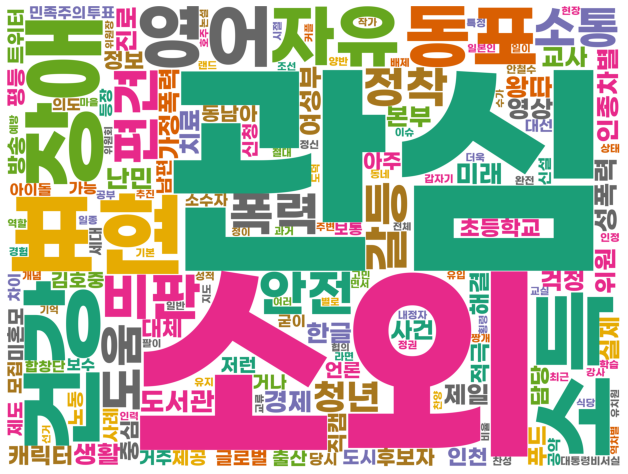

In [325]:
from wordcloud import WordCloud
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#generate_from_frequencies 미리 정의된 단어의 빈도수 dict를 이용하여 워드 클라우드를 그림
#  워드 클라우드를 generate할 때 마다 스타일이 미세하게 다르게 형성되는데,random_state 인자를 지정해주면 생성할 때마다 완전히 동일한 결과
wordcloud = WordCloud(font_path='GmarketSansTTFBold.ttf', width= 4000, 
                      height = 3000, random_state=1, background_color='white', 
                      colormap='Dark2', max_words=160).generate_from_frequencies(data)
plt.figure(figsize = (11, 11))
plt.imshow(wordcloud) #이미지 표시
plt.axis('off') #축 지우기

In [ ]:
[계층 수요]
# 뉴스 키워드로 '계층' + '뉴스키워드' or ' 광범위한 키워드' --> 트위터 검색 
# 트위터로 계속 단어 전처리 
# 의미있는 단어 나오면 내용 살피고, 의미 있는 단어들이 워드클라우드에 많이 나오면 걔로 프로그램 인사이트 



# 데이터 너무 많으면 밑에 코드

In [ ]:
aa = WordList(data_df_reset)

ll = data_df_reset['text']

ll_list = ll.tolist()

# okt.nouns

from konlpy.tag import Okt
okt = Okt()


list_1 = ll_list[:277374]
list_2 = ll_list[277374:]

import sys

o_ll = []
for i in trange(len(list_1)):
    o_ll.append(okt.nouns(list_1[i]))
    sys.stdout.flush()

o_ll2 = []
for i in trange(len(list_2)):
    o_ll2.append(okt.nouns(list_2[i]))
    sys.stdout.flush()
    
ss = []
sa = []
for i in range(len(o_ll)):
    ss.append(", ".join(o_ll[i]))
    
for i in range(len(o_ll2)):
    sa.append(", ".join(o_ll2[i]))
    
ss_df = pd.DataFrame(ss)
sa_df = pd.DataFrame(sa)

ss_df.to_csv('sample1.csv')
sa_df.to_csv('sample2.csv')

## 특정 키워드를 추출하는 함수 생성
- 수집된 트윗 내용으로부터 특정 키워드가 포함 되어있는지 찾아낸 후 키워드가 포함 되어있는 트윗을 찾아줌.
- 키워드가 포함되어있지 않는 경우 이를 삭제할 것인지 여부를 입력 파라미터에서 결정 가능
- 다수의 키워드를 한번에 입력할 수 있으며 이 경우 키워드 중 하나 이상이 트윗 내용에 존재하는 경우 참으로 간주됨

In [ ]:
# 인자 : 데이터 프레임 / 키워드 리스트 / 내용에 해당하는 컬럼 이름 / 헤시태그만 찾을 것인지 여부 / 키워드에 해당하는 내용이 없는 트윗 삭제 여부
# 리턴되는 결과 : 찾고자 하는 키워드가 있는 데이터가 존재하는 데이터 프레임
    # 조건 1: isOnlyHashtag 가 True 인 경우 키워드 앞에 # 를 붙여서 헤시태그에 해당하는 내용만 찾음 (False 인 경우 순수하게 키워드 존재 여부로 찾아주)
    # 조건 2 : isremove 가 True 인 경우 키워드를 찾지 못한 내용은 삭제한 후 리턴 (False 인경우 flag 만 붙여준 후 리턴)

    def search_keyword(df,keyword,contentCol,isOnlyHashtag,isremove):
    
    rs = df.copy(deep=True)
    target = rs[contentCol]
    keyword_low = []
    # 오로지 헤시태그만 찾고자 하는 경우 키워드 앞에 # 을 붙이는 과정을 진행한다.
    if(isOnlyHashtag == True):
        for k in range(0,len(keyword),1):
            keyword[k] = '#' + keyword[k]
    else:
        keyword = keyword
        
    for k in range(0,len(keyword),1):
        keyword_low.append(keyword[k].lower())
            
    rs['findKeywordFlag'] = False
    rs['findKeyword'] = ''
    
    row = -1
    for i in target: # 콘텐츠의 내용
        i_low = i.lower()
        row = row + 1
        for k in keyword_low: # 키워드 (대소문자는 구분하지 않음)
            
            if(i_low.find(k) >= 0): 
                rs['findKeywordFlag'][row] = True
                key = rs['findKeyword'][row]
                rs['findKeyword'][row] = rs['findKeyword'][row] +  k + '|'
                
    if(isremove == True):
        rs_L1 = rs[rs['findKeywordFlag'] == True]
        rs_L1 = rs_L1.reset_index(drop=True)
    else:
        rs_L1 = rs
        
    return rs_L1;

In [ ]:
# '공공도서관 프로그램'이라는 키워드에는 도서관 홍보자료가 너무 많아서 좋아요가 아예 없는 트윗은 제거했음
tweets_df.sort_values(by = "Like", ascending=False)
tweets_df1 = tweets_df[tweets_df['Like']>0]

In [ ]:
tweets_df1